In [1]:
#import packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from google.colab import files
from sklearn.preprocessing import PolynomialFeatures
#to plot within notebook
import matplotlib.pyplot as plt

In [2]:
import io

In [3]:
uploaded = files.upload()

Saving CSVForDate.csv to CSVForDate.csv


In [4]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "CSVForDate.csv" with length 307761 bytes


In [5]:
df = pd.read_csv(io.StringIO(uploaded['CSVForDate.csv'].decode('utf-8')))

In [6]:
df.head()

,Date,Open,High,Low,Close
0,09-Jan-95,3723.09,3744.84,3709.02,3709.02
1,10-Jan-95,3659.91,3668.35,3622.86,3623.06
2,11-Jan-95,3588.66,3602.91,3574.89,3600.79
3,12-Jan-95,3603.22,3603.22,3554.79,3574.90
4,13-Jan-95,3561.11,3613.60,3559.60,3603.66


In [14]:
import numpy as np
 
df['row_num'] = np.arange(len(df))
df['row_num'] = np.arange(df.shape[0])

In [15]:
y = np.asarray(df['Close'])
x = np.asarray(df['row_num'])

Text(0, 0.5, 'BSE index value for each day with 1st day-9-01-1995 ,last day-11-05-2021')

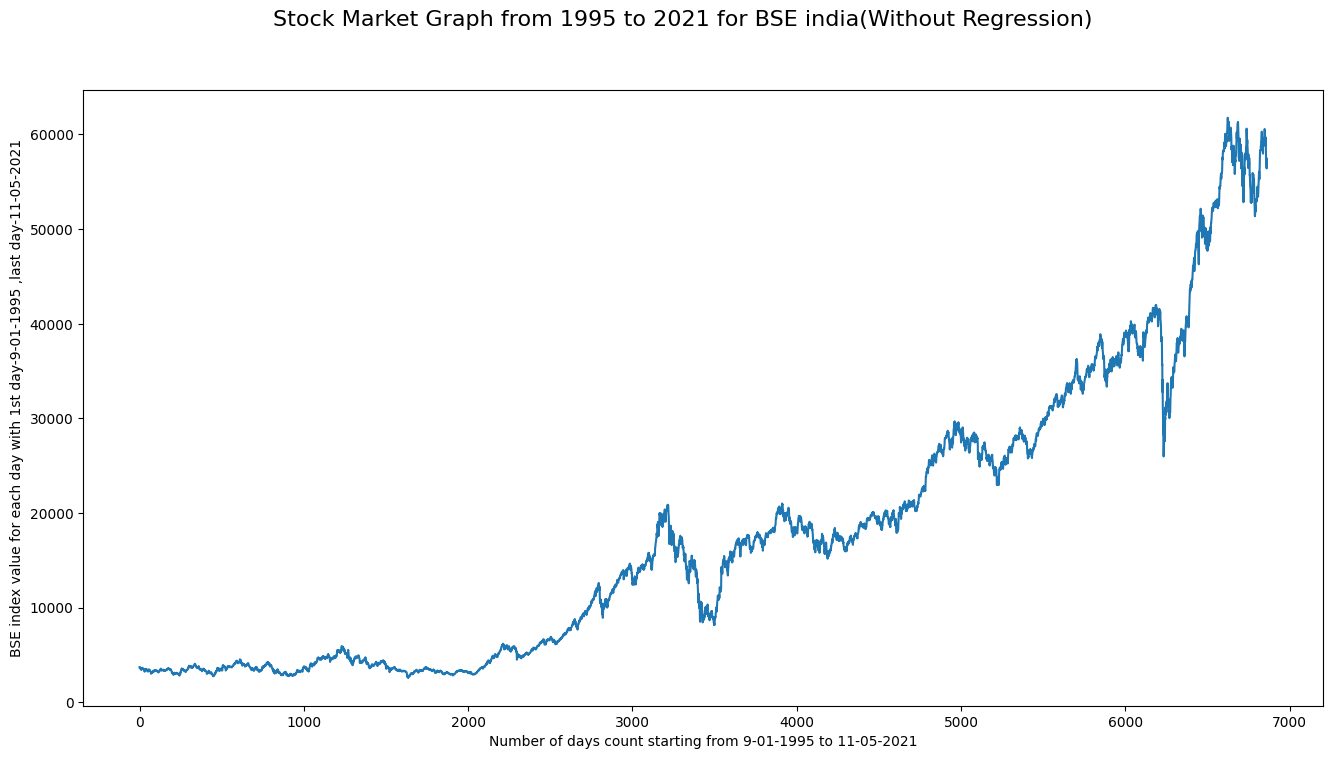

In [16]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
#plot the actual data
plt.figure(figsize=(16,8))
plt.plot(x,df['Close'],label='Close Price History')
plt.suptitle('Stock Market Graph from 1995 to 2021 for BSE india(Without Regression)', fontsize=16)
plt.xlabel("Number of days count starting from 9-01-1995 to 11-05-2021")
plt.ylabel("BSE index value for each day with 1st day-9-01-1995 ,last day-11-05-2021")

In [17]:
#Model initialization
#by default the degree of the equation is 1.
#Hence the mathematical model equation is y = mx + c, 
#which is an equation of a line.
regression_model = LinearRegression()


In [18]:
#Choose the order of your polynomial. Here the degree is set to 5.
#hence the mathematical model equation is 
#y = c0 + c1.x**1 + c2.x**2+....+ c5.x**5
poly = PolynomialFeatures(5)


In [19]:
#Convert dimension x in the higher degree polynomial expression
X_transform = poly.fit_transform(x.reshape(-1, 1))

In [20]:
#Fit the data(train the model)
regression_model.fit(X_transform, y.reshape(-1, 1))

LinearRegression()

In [21]:
# Prediction for historical dates. Let's call it learned values.
y_learned = regression_model.predict(X_transform)

In [22]:
#Now, add future dates to the date index and pass that index to 
#the regression model for future prediction.
#As we have converted date index into a range index, hence, here we 
#just need to add 3650 days ( roughly 10 yrs)
#to the previous index. x[-1] gives the last value of the series.
newindex = np.asarray(pd.RangeIndex(start=x[-1], stop=x[-1] + 1000))

In [23]:
#Convert the extended dimension x in the higher degree polynomial expression
X_extended_transform = poly.fit_transform(newindex.reshape(-1, 1))

In [24]:
#Prediction for future dates. Let's call it predicted values.
y_predict = regression_model.predict(X_extended_transform)

In [25]:
#Print the last predicted value
print ("Closing price at 2024 would be around ", y_predict[-1])

Closing price at 2024 would be around  [135432.2059468]


In [26]:
future_x = newindex

In [27]:
#function to calculate compound annual growth rate
def CAGR(first, last, periods):
    return ((last/first)**(1/periods)-1) * 100


In [28]:

#Print CAGR for next ten years.
print ('Your investments will have a CAGR of ',(CAGR(y[-1], y_predict[-1], 10)), '%')

Your investments will have a CAGR of  [8.95838133] %


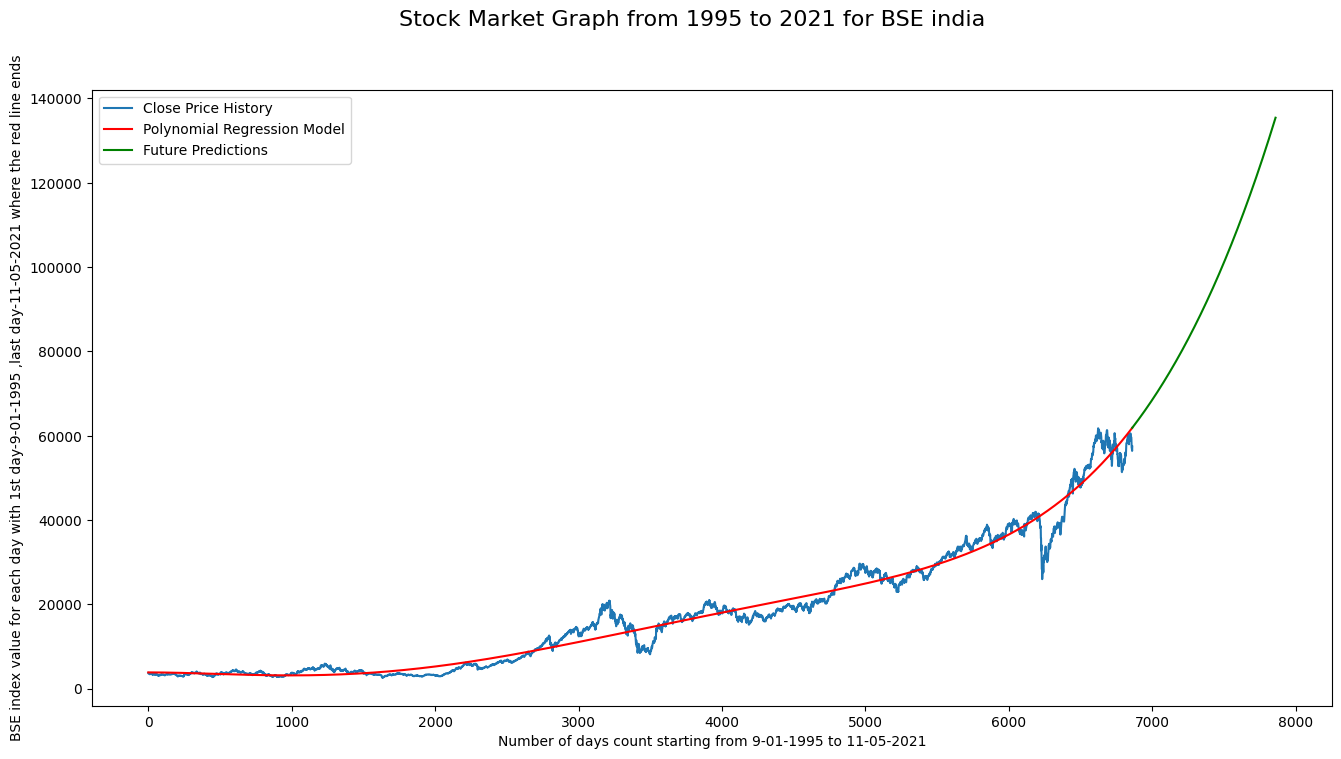

In [31]:
#Setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#Plot the actual data
plt.figure(figsize=(16,8))
plt.plot(x,df['Close'], label='Close Price History')

#Plot the regression model
plt.plot(x,y_learned, color='r', label='Polynomial Regression Model')

#Plot the future predictions
plt.plot(future_x,y_predict, color='g', label='Future Predictions')

#Set the title of the graph
plt.suptitle('Stock Market Graph from 1995 to 2021 for BSE india', fontsize=16)
plt.xlabel("Number of days count starting from 9-01-1995 to 11-05-2021")
plt.ylabel("BSE index value for each day with 1st day-9-01-1995 ,last day-11-05-2021 where the red line ends")
#Set the title of the graph window
fig = plt.gcf()
#fig.canvas.set_window_title('Stock Market Predictions')

#display the legends
plt.legend()
#display the graph
plt.show()